<a href="https://colab.research.google.com/github/sakamrani2020/Flower_Recognition/blob/main/Flower_Recognition_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import zipfile

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"]="/content/drive/MyDrive/KAGGLE_Dataset"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!kaggle datasets download -d alxmamaev/flowers-recognition

 99% 223M/225M [00:10<00:00, 25.7MB/s]
100% 225M/225M [00:10<00:00, 22.3MB/s]


In [ ]:
Zip_ref=zipfile.ZipFile("/content/flowers-recognition.zip")
Zip_ref.extractall("/tmp")
Zip_ref.close()

In [ ]:
import os
import cv2
import numpy as np

#Encoding and Split data into Train/Test Sets
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#Tensorflow Keras CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

#Plot Images
import matplotlib.pyplot as plt


In [ ]:
folder_dir = '/tmp/flowers'

In [ ]:
data = []
label = []

SIZE = 128 #Crop the image to 128x128

for folder in os.listdir(folder_dir):
    for file in os.listdir(os.path.join(folder_dir, folder)):
        if file.endswith("jpg"):
            label.append(folder)
            img = cv2.imread(os.path.join(folder_dir, folder, file))
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            im = cv2.resize(img_rgb, (SIZE,SIZE))
            data.append(im)
        else:
            continue

In [ ]:
data_arr = np.array(data)
label_arr = np.array(label)
print(data_arr)
print(label_arr)

[[[[ 87  97 120]
   [ 85  96 118]
   [ 86  94 117]
   ...
   [ 75  87 109]
   [ 74  85 107]
   [ 77  88 110]]

  [[ 88  96 119]
   [ 87  96 119]
   [ 84  95 116]
   ...
   [ 71  82 102]
   [ 72  83 103]
   [ 74  85 105]]

  [[ 90  96 120]
   [ 90  96 120]
   [ 88  95 119]
   ...
   [ 74  85 105]
   [ 77  89 108]
   [ 75  87 109]]

  ...

  [[ 35  43  19]
   [ 35  45  23]
   [ 39  48  26]
   ...
   [ 56  52  23]
   [ 63  65  13]
   [ 40  45  14]]

  [[ 37  47  22]
   [ 32  40  18]
   [ 35  44  24]
   ...
   [ 51  46  21]
   [ 70  69  16]
   [ 50  57  24]]

  [[ 43  52  28]
   [ 47  55  31]
   [ 46  55  31]
   ...
   [ 65  58  20]
   [ 72  72  18]
   [ 37  47  17]]]


 [[[ 46  87  66]
   [ 44  88  66]
   [ 42  77  62]
   ...
   [ 43  80   7]
   [ 45  74  43]
   [ 47  72  24]]

  [[ 37  71  55]
   [ 34  76  55]
   [ 36  70  53]
   ...
   [ 52  85  20]
   [ 30  64  28]
   [114 131  45]]

  [[ 49  80  59]
   [ 31  74  50]
   [ 49  84  63]
   ...
   [ 36  65  38]
   [ 36  52  14]
   [110 139

In [ ]:
encoder = LabelEncoder()
y = encoder.fit_transform(label_arr)
y = to_categorical(y,5)
X = data_arr/255

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

In [ ]:
#build a neural network model for the task of Flower Recognition:

model = Sequential()
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu', input_shape = (SIZE,SIZE,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(5, activation = "softmax"))

In [ ]:
#Before compiling the model we need to create more training images to prevent overfitting:

datagen = ImageDataGenerator(
        rotation_range=20,
        zoom_range = 0.20,
        width_shift_range=0.3,
        height_shift_range=0.3,
        horizontal_flip=True,
        vertical_flip=True)

datagen.fit(X_train)

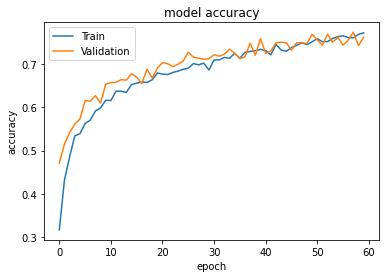

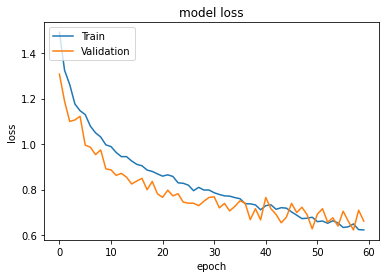

In [ ]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
model.compile(optimizer=Adam(lr=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])
batch_size=32
epochs=60
history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
                              epochs = epochs,
                              validation_data = (X_test,y_test),
                              verbose = 1)

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/60
108/108 [==============================] - 26s 153ms/step - loss: 1.4921 - accuracy: 0.3160 - val_loss: 1.3077 - val_accuracy: 0.4711
Epoch 2/60
108/108 [==============================] - 14s 131ms/step - loss: 1.3247 - accuracy: 0.4315 - val_loss: 1.1883 - val_accuracy: 0.5150
Epoch 3/60
108/108 [==============================] - 16s 145ms/step - loss: 1.2616 - accuracy: 0.4851 - val_loss: 1.0995 - val_accuracy: 0.5417
Epoch 4/60
108/108 [==============================] - 19s 175ms/step - loss: 1.1766 - accuracy: 0.5340 - val_loss: 1.1061 - val_accuracy: 0.5613
Epoch 5/60
108/108 [==============================] - 14s 132ms/step - loss: 1.1467 - accuracy: 0.5390 - val_loss: 1.1222 - val_accuracy: 0.5729
Epoch 6/60
108/108 [==============================] - 15s 138ms/step - loss: 1.1300 - accuracy: 0.5627 - val_loss: 0.9954 - val_accuracy: 0.6157
Epoch 7/60
108/108 [==============================] - 16s 151ms/step - loss: 1.0788 - accuracy: 0.5705 - val_loss: 0.9861 - val_ac

27/27 [==============================] - 1s 23ms/step


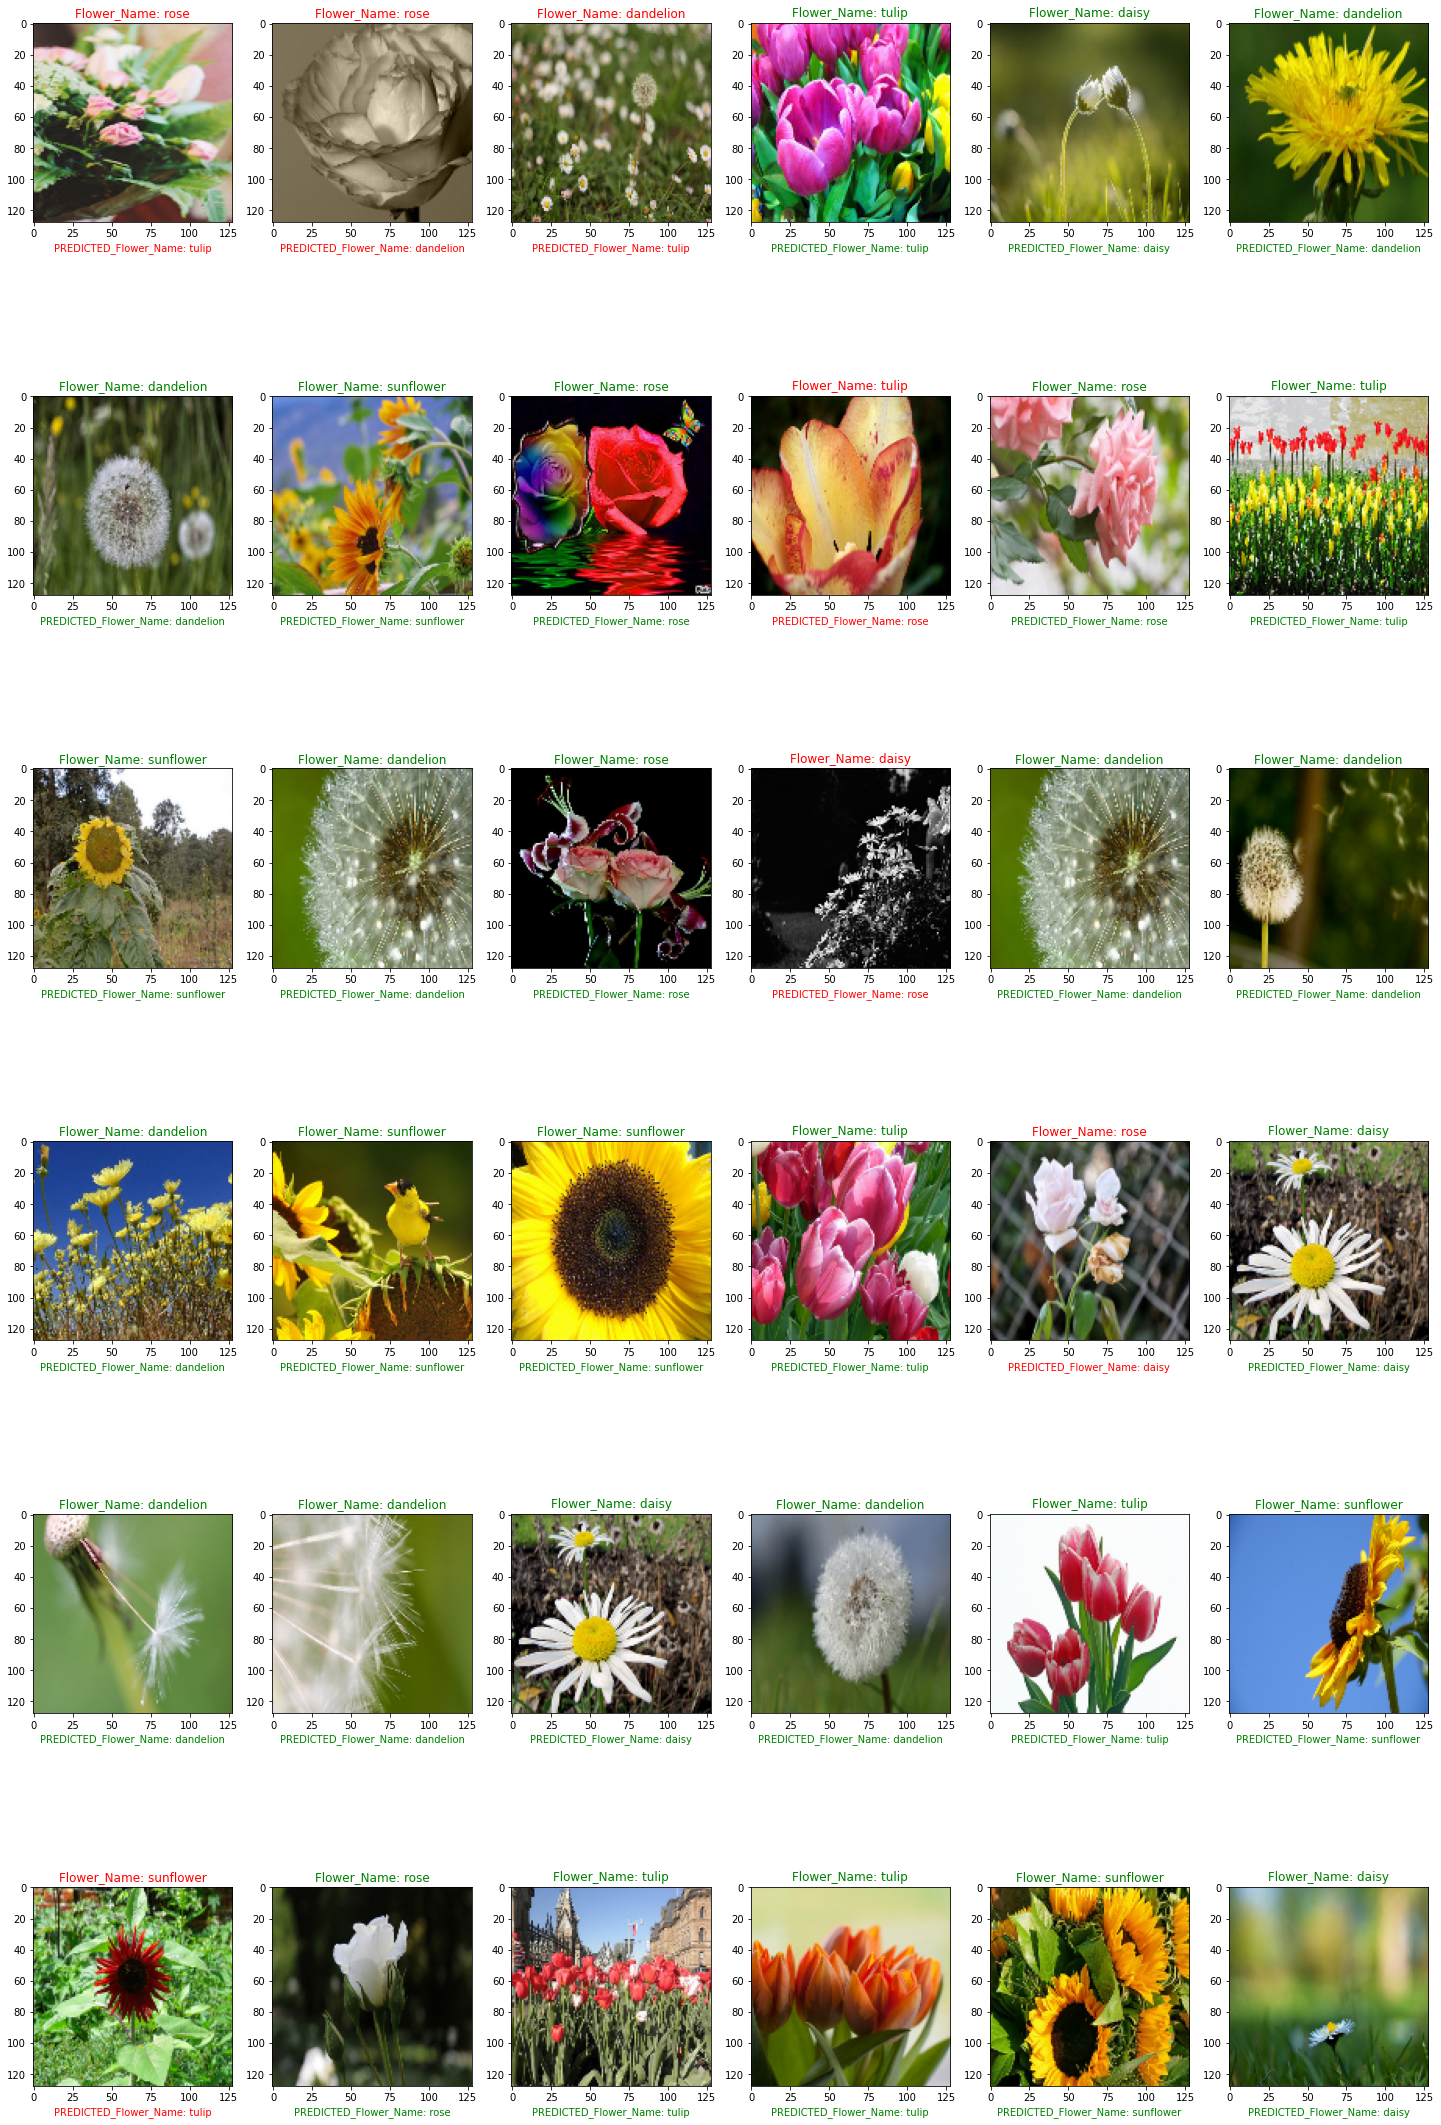

In [ ]:
categories = np.sort(os.listdir(folder_dir))
fig, ax = plt.subplots(6,6, figsize=(25, 40))

for i in range(6):
    for j in range(6):
        k = int(np.random.random_sample() * len(X_test))
        if(categories[np.argmax(y_test[k])] == categories[np.argmax(model.predict(X_test)[k])]):
            ax[i,j].set_title("Flower_Name: " + categories[np.argmax(y_test[k])], color='green')
            ax[i,j].set_xlabel("PREDICTED_Flower_Name: " + categories[np.argmax(model.predict(X_test)[k])], color='green')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')
        else:
            ax[i,j].set_title("Flower_Name: " + categories[np.argmax(y_test[k])], color='red')
            ax[i,j].set_xlabel("PREDICTED_Flower_Name: " + categories[np.argmax(model.predict(X_test)[k])], color='red')
            ax[i,j].imshow(np.array(X_test)[k].reshape(SIZE, SIZE, 3), cmap='gray')